# OLTP Database
Objectives:

*   design a data platform that uses MySQL as an OLTP database.
*   design the schema for OLTP database.
*   load data into OLTP database.
*   automate admin tasks.












OLTP Database

Task 1 - Create a database.
Create a database named sales.

Task 2 - Design a table named sales_data based on the sample data.
Create the sales_data table in sales database.

Task 3 - List the tables in the database sales.

Task 4 - Import the data 
Import the data from oltpdata.csv into sales_data table

Task 5 - Write a query to find out the count of records in the tables sales_data.

Task 6 - Create an index named ts on the timestamp field.

Task 7 - List indexes on the table sales_data.

Task 8 - Write a bash script to export data.
Write a bash script named datadump.sh that exports all the rows in the sales_data table to a file named sales_data.sql


In [1]:
# prepare .env for credentials
# install python .env
!pip install python-dotenv

# import module 
from dotenv import load_dotenv
import os

# load .env
load_dotenv()

# test
print(os.getenv("database"))

sales



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\fruityty\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


**Create database and table with MySQL CLI in localhost database**

Task 1 - Create a database named sales.


    CREATE DATABASE sales

Task 2 - Design a table named sales_data.
create table sales_data

    CREATE TABLE sales_data 
            (product_id INT, 
            customer_id INT, 
            price FLOAT, 
            quantity INT, 
            timestamp DATETIME)


sample sales_data table

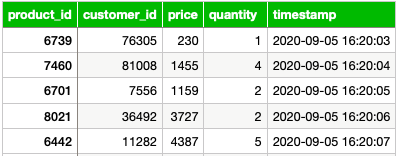


In [2]:
# check databases and tables
# install MySQL driver 
!pip install mysql-connector-python

# import module
import mysql.connector


# MySQL database credentials 
host = os.getenv("host")
user = os.getenv("user")
password = os.getenv("password")
port = os.getenv("port")
database = os.getenv("database")

# establish connection
db = mysql.connector.connect(
    host=host,
    user=user,
    port=port,
    password=password,
    database=database
    )

# print connection status
if db.is_connected():
  print("Connection successful")

# create a cursor object
mycursor = db.cursor()

# execute a query
mycursor.execute("show tables")

# fetch all tables
tables = mycursor.fetchall()

# Task 3 - List the tables in the database sales.
# print tables
for t in tables:
  print(t)

# close cursor 
mycursor.close()

# close connection
#db.close()





[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\fruityty\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Connection successful
('sales_data',)


True

In [4]:
# Task 4 - Import the data in the file oltpdata.csv to MySQL
# import module
import csv

# open the CSV file
filename = "oltpdata.csv"
table = "sales_data"

# if db is still connect
if db.is_connected():
    # read csv file 
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)

        # create a cursor object
        cursor = db.cursor()

        # iterate over the rows in the CSV file
        for row in reader:
            # insert the row into the database
            sql = f"INSERT INTO {table} (product_id, customer_id, price, quantity, timestamp) VALUES (%s, %s, %s, %s, %s)"
            val = (row[0], row[1], row[2], row[3], row[4])
            cursor.execute(sql, val)
      
    # commit all the changes to the database at once
    db.commit()
    print("Import data successful")

# close the database connection
cursor.close()
# db.close()



Import data successful


True

In [5]:
# Task 5 - Write a query to find out the count of records in the tables sales_data.
# install pandas 
# !pip install pandas

# import module
import pandas as pd

# create function execute mysql statement
def mysql_exec(query):
    # create a cursor object
    with db.cursor() as cursor:

        # execute a query
        cursor.execute(query)

        # fetch all result
        result = cursor.fetchall()

        if result:
            # get column names
            columns = [col[0] for col in cursor.description]
            
            # convert result into dataframe
            df = pd.DataFrame(result, columns=columns)

            # print df
            print(df)

            return df
        else:
            return None

# sql statement
sql = "SELECT * FROM sales.sales_data;"

# get query result
records = mysql_exec(sql)

# print count rows if query result is not empty
if records is not None:
    print("number of rows: ", len(records))
else:
    print("query result is empty")



      product_id  customer_id price  quantity           timestamp
0           6739        76305   230         1 2020-09-05 16:20:03
1           7460        81008  1455         4 2020-09-05 16:20:04
2           6701         7556  1159         2 2020-09-05 16:20:05
3           8021        36492  3727         2 2020-09-05 16:20:06
4           6442        11282  4387         5 2020-09-05 16:20:07
...          ...          ...   ...       ...                 ...
2600        6194        20381  3580         1 2020-09-05 17:03:23
2601        5966        39624  1318         5 2020-09-05 17:03:24
2602        8708         2360  3089         1 2020-09-05 17:03:25
2603        6991        41176  1119         3 2020-09-05 17:03:26
2604        8711        63757  3391         2 2020-09-05 17:03:27

[2605 rows x 5 columns]
number of rows:  2605


In [6]:
# Task 6 - Create an index named ts on the timestamp field.
# check is there already have index
mysql_exec("USE information_schema;")
res = mysql_exec("SELECT * FROM statistics WHERE table_name = 'sales_data' ")

# in case of there is no index
if res is None:
    mysql_exec("USE sales;")
    mysql_exec("CREATE INDEX idx_product_id ON sales_data(product_id)")

    # commit changes to the database
    db.commit()
    
# Task 7 - List indexes on the table sales_data.
mysql_exec("USE sales;")
mysql_exec("SHOW INDEXES FROM sales_data;")

# close connection
db.close()


  TABLE_CATALOG TABLE_SCHEMA  TABLE_NAME  NON_UNIQUE INDEX_SCHEMA  \
0           def        sales  sales_data           1        sales   

       INDEX_NAME  SEQ_IN_INDEX COLUMN_NAME COLLATION  CARDINALITY SUB_PART  \
0  idx_product_id             1  product_id         A            0     None   

  PACKED NULLABLE INDEX_TYPE COMMENT INDEX_COMMENT IS_VISIBLE EXPRESSION  
0   None      YES      BTREE                              YES       None  
        Table  Non_unique        Key_name  Seq_in_index Column_name Collation  \
0  sales_data           1  idx_product_id             1  product_id         A   

   Cardinality Sub_part Packed Null Index_type Comment Index_comment Visible  \
0            0     None   None  YES      BTREE                           YES   

  Expression  
0       None  


Task 8 - Write a bash script to export data.

install mysqldump

`!pip install mysqldump`


shell script to backup data

datadump.sh

```
#!/bin/bash
# Interpreter to shell script

# Set backup folder path
# Set backup folder name to today date
backupfolder=/home/user/mysqldumps/$(date +%Y%m%d)

# Make directory 
mkdir $backupfolder

# Set sql file path
sqlfile = $backupfolder/sales_data.sql

# Create backup by mysqldump
mysqldump --databases sales --tables sales_data --host=localhost --port=3306 --user=user --password=password > $sqlfile
```


